<a href="https://colab.research.google.com/github/ggutierrezf/ALURA-CHALLENGE-03/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# CHALLENGE TELECOM PARTE 2**

🛠️ Preparación de los Datos

**Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

In [ ]:
df_telecom = pd.read_csv("/content/Telecomx_latam_final.csv")
display(df_telecom.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [ ]:
# Identify columns that do not provide value for analysis or predictive models.
# This often includes unique identifiers.
# In this dataset, it's likely there's a customer ID column, though it's not visible in the head().
# Assuming 'customerID' might be a candidate if it exists, otherwise we'll look for others.
# Let's check for columns with a high number of unique values, which could indicate an identifier.

# Get the number of unique values for each column
unique_counts = df_telecom.nunique()

# Display columns with a high number of unique values (e.g., close to the number of rows)
# A common threshold for potential identifiers is if the number of unique values is equal to the number of rows.
potential_id_columns = unique_counts[unique_counts == len(df_telecom.index)]

print("Columns with unique values equal to the number of rows (potential identifiers):")
print(potential_id_columns)

# Also, consider columns that might have low variance or are constant, providing little information.
# (Though the prompt specifically asks about identifiers, it's good practice to consider these too)
# Let's check the variance of numerical columns
# print("\nVariance of numerical columns:")
# print(df_telecom.describe().loc['std'])

# Based on the visible columns in the head(), there doesn't seem to be an obvious ID column.
# If 'customerID' exists, it would be a prime candidate for removal.
# Let's assume for now that if 'customerID' exists, we'd remove it.
# Since it's not visible, we'll rely on the unique value count for now.

# If potential_id_columns is not empty, these are likely candidates for removal.
# You would typically drop these columns before building predictive models.
# Example of how to drop:
# if not potential_id_columns.empty:
#     columns_to_drop = potential_id_columns.index.tolist()
#     df_telecom_cleaned = df_telecom.drop(columns=columns_to_drop)
#     print(f"\nDropped potential identifier columns: {columns_to_drop}")
#     display(df_telecom_cleaned.head())
# else:
#     print("\nNo columns found with unique values equal to the number of rows.")

Columns with unique values equal to the number of rows (potential identifiers):
Series([], dtype: int64)


**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [ ]:
# Based on the previous step, no columns were identified as unique identifiers
# (columns with unique values equal to the number of rows).

# If you have identified other columns that you believe do not contribute value
# to your analysis or predictive models based on other criteria (e.g., low variance,
# domain knowledge, or other exploratory analysis), you can list them here
# and drop them from the DataFrame.

# Example:
# columns_to_drop = ['column_name_1', 'column_name_2']
# df_telecom_cleaned = df_telecom.drop(columns=columns_to_drop)

# For now, assuming no columns to drop based on the previous check:
df_telecom_cleaned = df_telecom.copy()

print("DataFrame after considering removal of non-contributing columns:")
display(df_telecom_cleaned.head())

# You can now proceed with further analysis or modeling using df_telecom_cleaned

DataFrame after considering removal of non-contributing columns:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [ ]:
# Select categorical columns (excluding the target variable 'Churn' if it's categorical)
categorical_cols = df_telecom_cleaned.select_dtypes(include='object').columns.tolist()

# Assuming 'Churn' is the target variable and should not be one-hot encoded yet
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print(f"Categorical columns to encode: {categorical_cols}")

# Apply one-hot encoding
df_telecom_encoded = pd.get_dummies(df_telecom_cleaned, columns=categorical_cols, drop_first=True)

print("\nDataFrame after one-hot encoding:")
display(df_telecom_encoded.head())

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

DataFrame after one-hot encoding:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,no,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,no,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,yes,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,yes,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,yes,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [ ]:
# Calculate the counts of each class in the 'Churn' column
churn_counts = df_telecom_encoded['Churn'].value_counts()

# Calculate the proportion of each class
churn_proportions = df_telecom_encoded['Churn'].value_counts(normalize=True)

print("Distribution of Churn (Counts):")
print(churn_counts)

print("\nDistribution of Churn (Proportions):")
print(churn_proportions)

# Evaluate if there is a significant class imbalance
# A common rule of thumb is that imbalance is significant if the ratio of the majority to minority class is > 2:1 or 3:1
churn_ratio = churn_counts.max() / churn_counts.min()

print(f"\nRatio of majority to minority class: {churn_ratio:.2f}")

if churn_ratio > 2:
    print("\nThere is a significant class imbalance.")
else:
    print("\nThere is no significant class imbalance based on a 2:1 ratio threshold.")

Distribution of Churn (Counts):
Churn
no     5174
yes    1869
Name: count, dtype: int64

Distribution of Churn (Proportions):
Churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64

Ratio of majority to minority class: 2.77

There is a significant class imbalance.


**Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Separate features (X) and target variable (y)
X = df_telecom_encoded.drop('Churn', axis=1)
y = df_telecom_encoded['Churn']

# Encode the target variable 'Churn' to numerical (0 and 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets before applying SMOTE
# It's crucial to apply SMOTE only on the training data to avoid data leakage
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# Impute missing values in the training data
# Using SimpleImputer with a strategy (e.g., 'mean', 'median', 'most_frequent')
# For numerical data, 'mean' or 'median' are common.
# For demonstration, let's use the mean.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train_encoded)

print("Shape of original training data (X_train):", X_train.shape)
print("Shape of imputed training data (X_train_imputed):", X_train_imputed.shape)
print("Shape of resampled training data (X_train_resampled):", X_train_resampled.shape)
print("\nDistribution of the target variable in the original training data:")
print(pd.Series(y_train_encoded).value_counts())
print("\nDistribution of the target variable in the resampled training data:")
print(pd.Series(y_train_resampled).value_counts())

Shape of original training data (X_train): (5282, 31)
Shape of imputed training data (X_train_imputed): (5282, 31)
Shape of resampled training data (X_train_resampled): (7760, 31)

Distribution of the target variable in the original training data:
0    3880
1    1402
Name: count, dtype: int64

Distribution of the target variable in the resampled training data:
0    3880
1    3880
Name: count, dtype: int64


**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

Correlation with Churn:
Churn_numeric                            1.000000
InternetService_fiber optic              0.308020
PaymentMethod_electronic check           0.301919
Charges.Monthly                          0.193356
Cuentas_Diarias                          0.193356
PaperlessBilling_yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_yes                          0.063228
StreamingMovies_yes                      0.061382
MultipleLines_yes                        0.040102
PhoneService_yes                         0.011942
gender_male                             -0.008612
MultipleLines_no phone service          -0.011942
DeviceProtection_yes                    -0.066160
OnlineBackup_yes                        -0.082255
PaymentMethod_mailed check              -0.091683
PaymentMethod_credit card (automatic)   -0.134302
Partner_yes                             -0.150448
Dependents_yes                          -0.164221
TechSupport_yes           

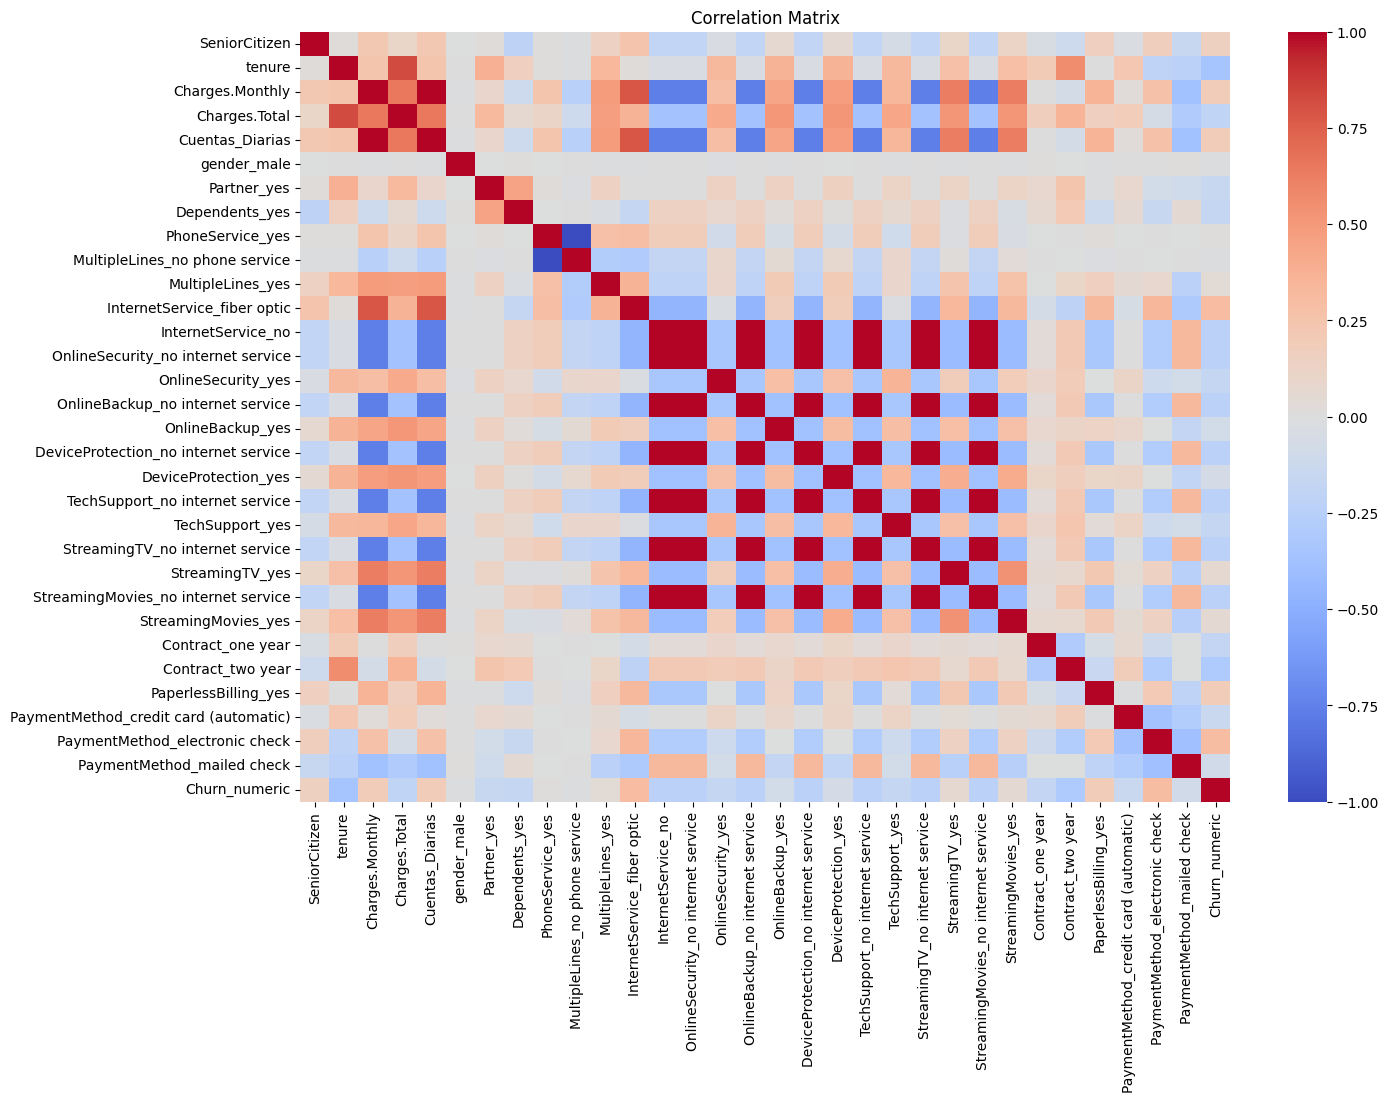

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a temporary numeric 'Churn' column
df_telecom_encoded['Churn_numeric'] = df_telecom_encoded['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the original string 'Churn' column before calculating correlation
df_telecom_numeric = df_telecom_encoded.drop('Churn', axis=1)

# Calculate the correlation matrix on the DataFrame with only numeric columns
correlation_matrix = df_telecom_numeric.corr()

# Display the correlation of features with the 'Churn' variable (using the temporary numeric column)
correlation_with_churn = correlation_matrix['Churn_numeric'].sort_values(ascending=False)

print("Correlation with Churn:")
print(correlation_with_churn)

# Visualize the correlation matrix as a heatmap (optional, for overall understanding)
# You might want to select a subset of features for better visualization if there are too many
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Drop the temporary numeric 'Churn' column from the original encoded DataFrame
df_telecom_encoded = df_telecom_encoded.drop('Churn_numeric', axis=1)

**Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

  Tiempo de contrato x Cancelación
  
  Gasto total x Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

**🤖 Modelado Predictivo**

**Separación de Datos**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

**Creación de Modelos**

Descripción
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

**Evaluación de los Modelos**

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

**📋 Interpretación y Conclusiones**

**Análisis de la Importancia de las Variables**

Descripción
Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

**Conclusión**